# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

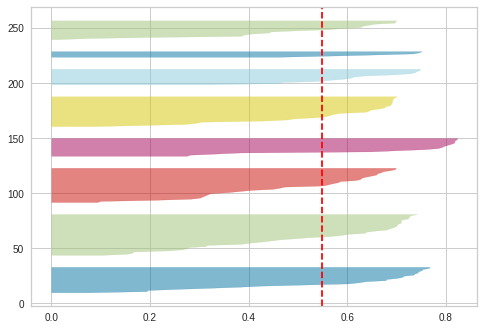

In [3]:

from sklearn.cluster import KMeans
from sklearn import metrics


km_8=KMeans(n_clusters=8, random_state=0).fit(X)

from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km_8, colors='yellowbrick')
visualizer.fit(X);

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

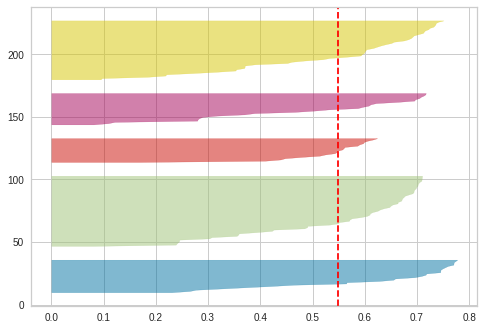

In [4]:

km_5=KMeans(n_clusters=5, random_state=0).fit(X)

visualizer = SilhouetteVisualizer(km_5, colors='yellowbrick')
visualizer.fit(X);

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

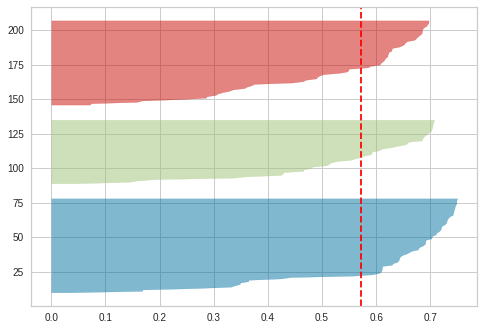

In [5]:

km_3=KMeans(n_clusters=3, random_state=0).fit(X)

visualizer = SilhouetteVisualizer(km_3, colors='yellowbrick')
visualizer.fit(X);

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

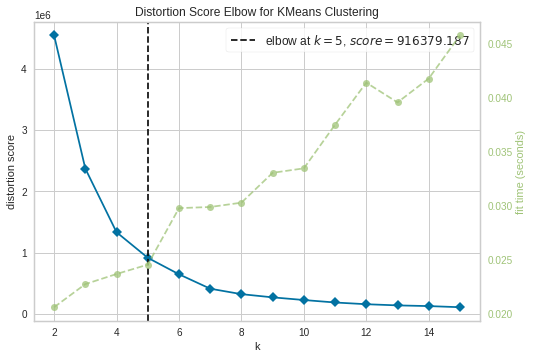

In [6]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,16))

visualizer.fit(X)        
visualizer.show();        

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

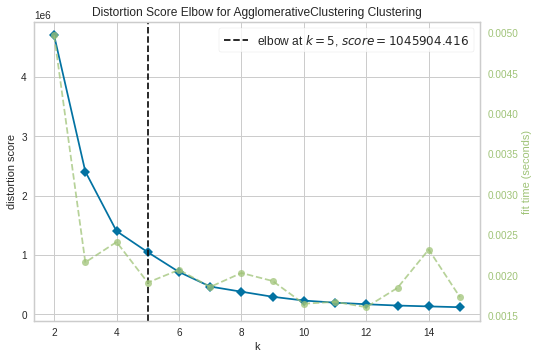

In [7]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,16))

visualizer.fit(X)        
visualizer.show();    
# Less clusters tha KMEANS

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

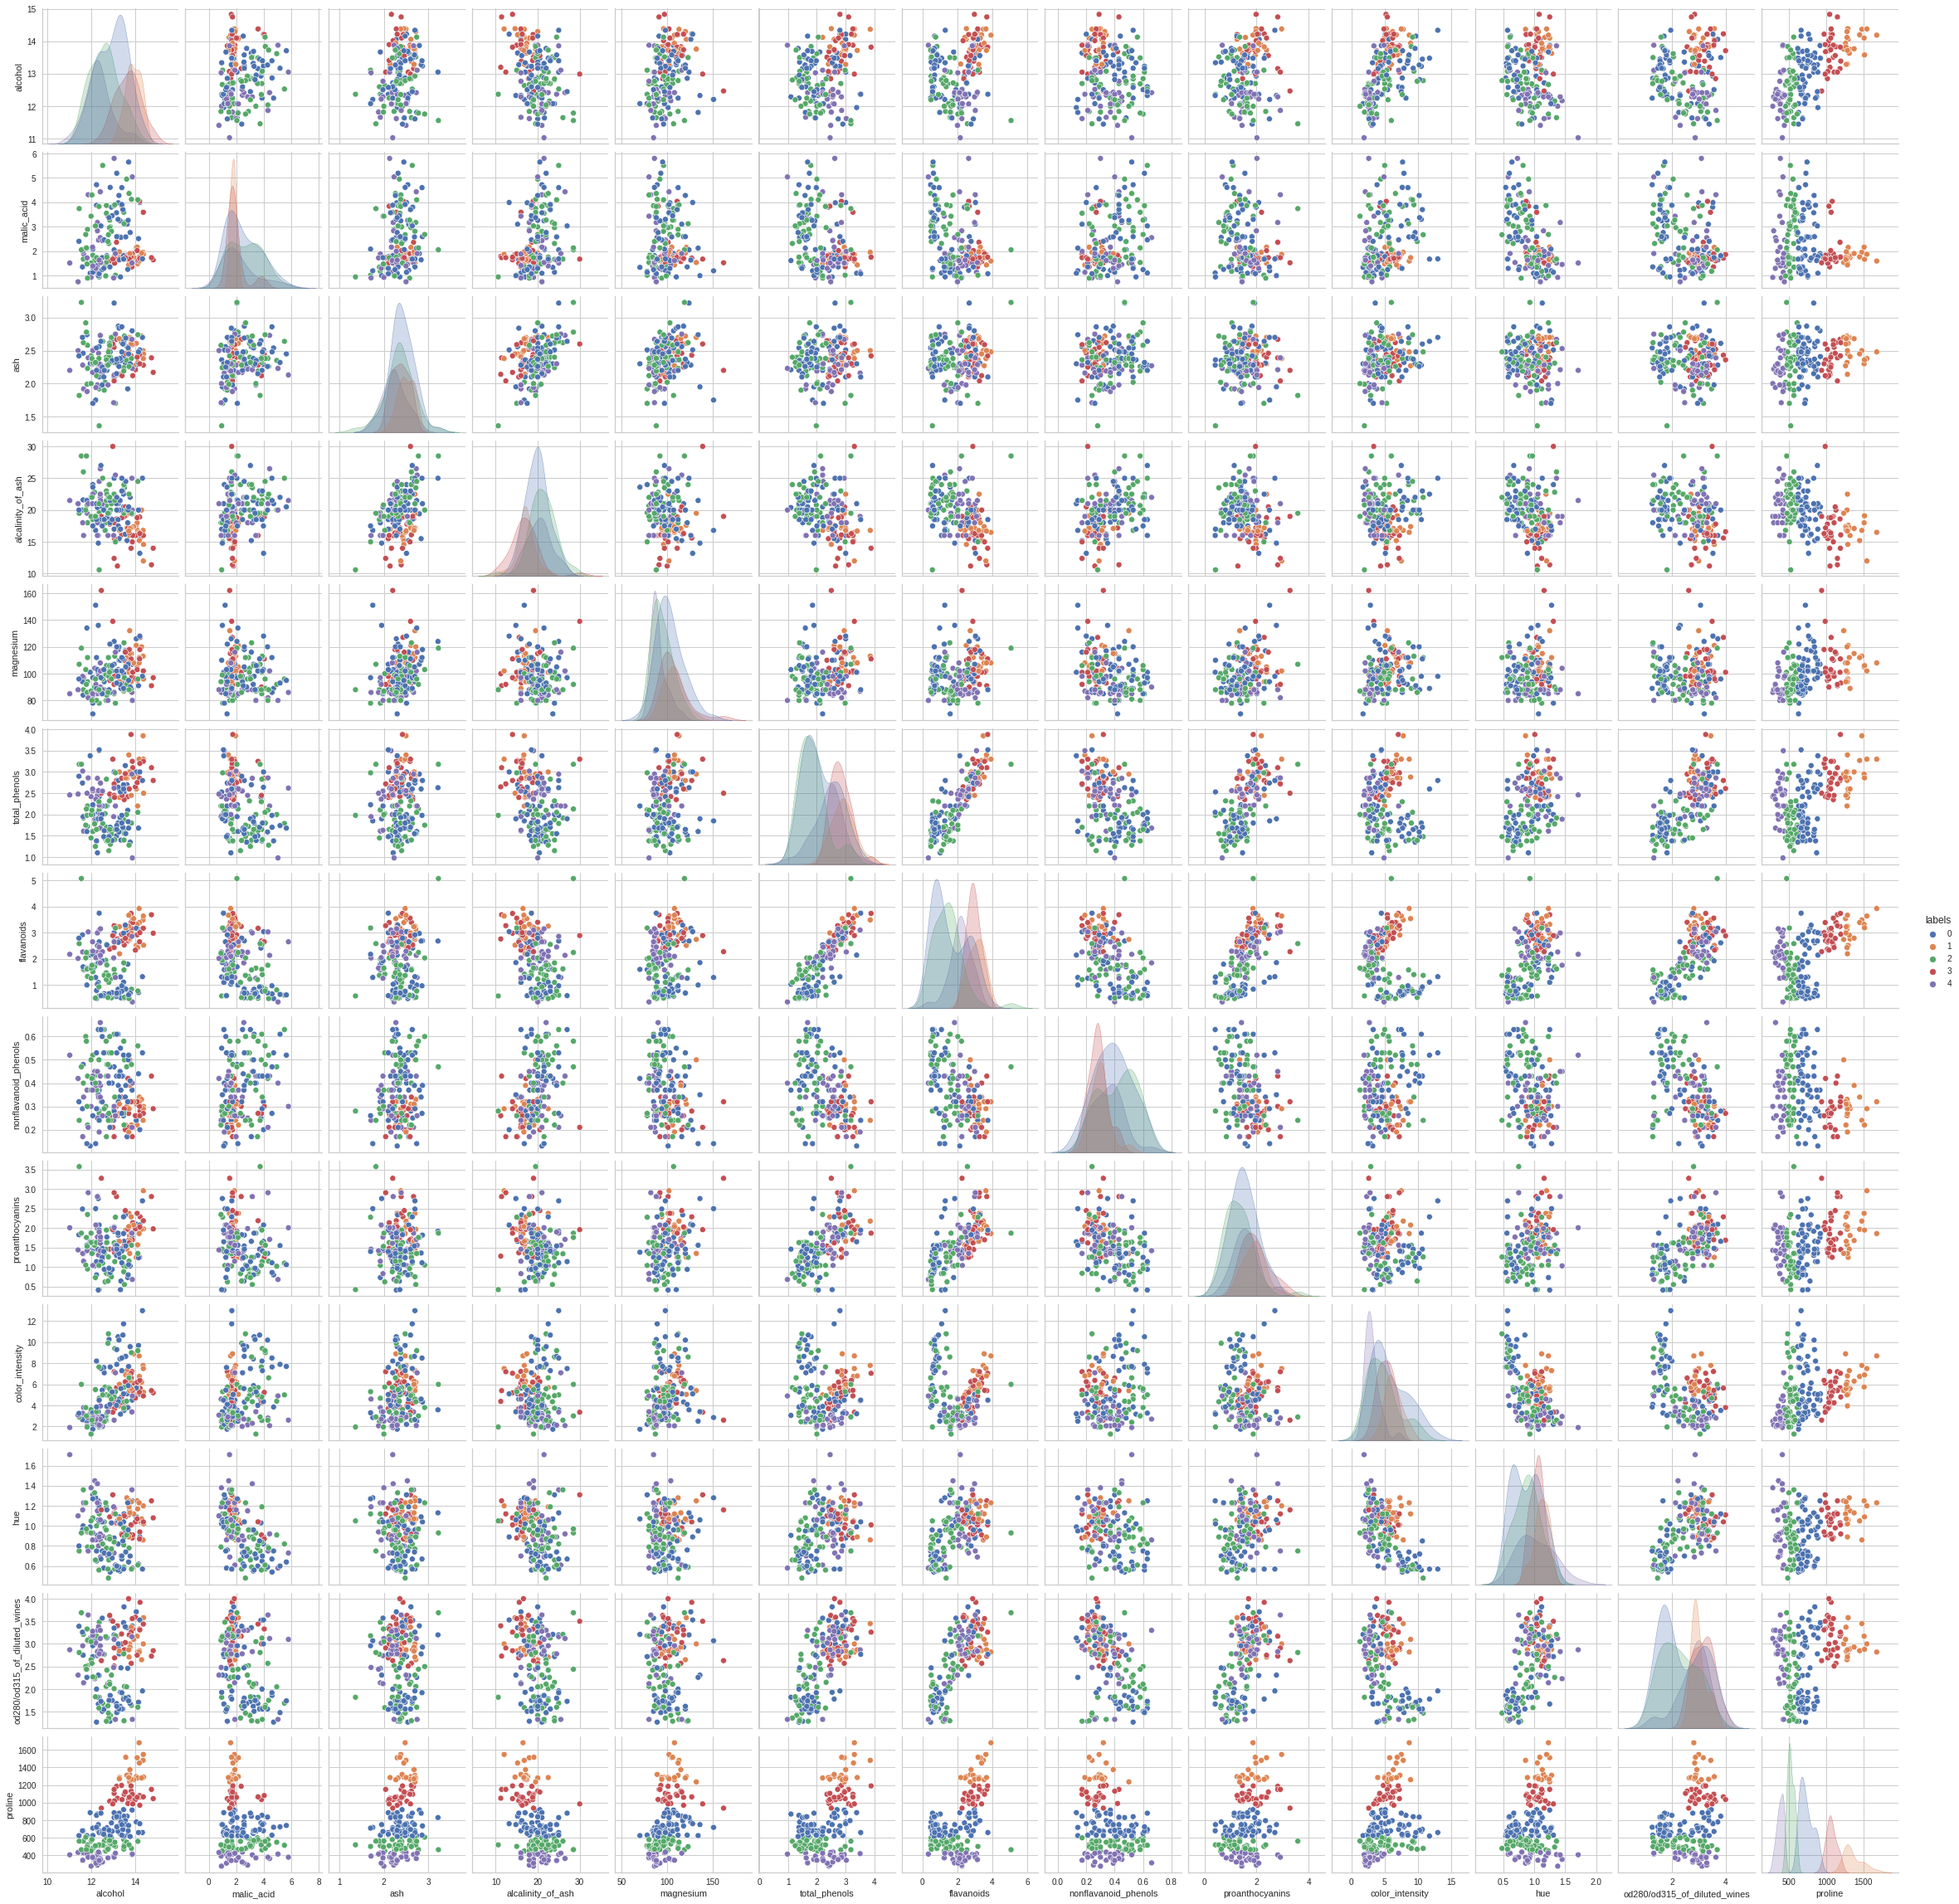

In [8]:
import seaborn as sns
ac_5=AgglomerativeClustering(n_clusters=5).fit(X)

df=X
df["labels"]=ac_5.labels_

sns.pairplot(df, hue="labels", diag_kind="kde", palette="deep");

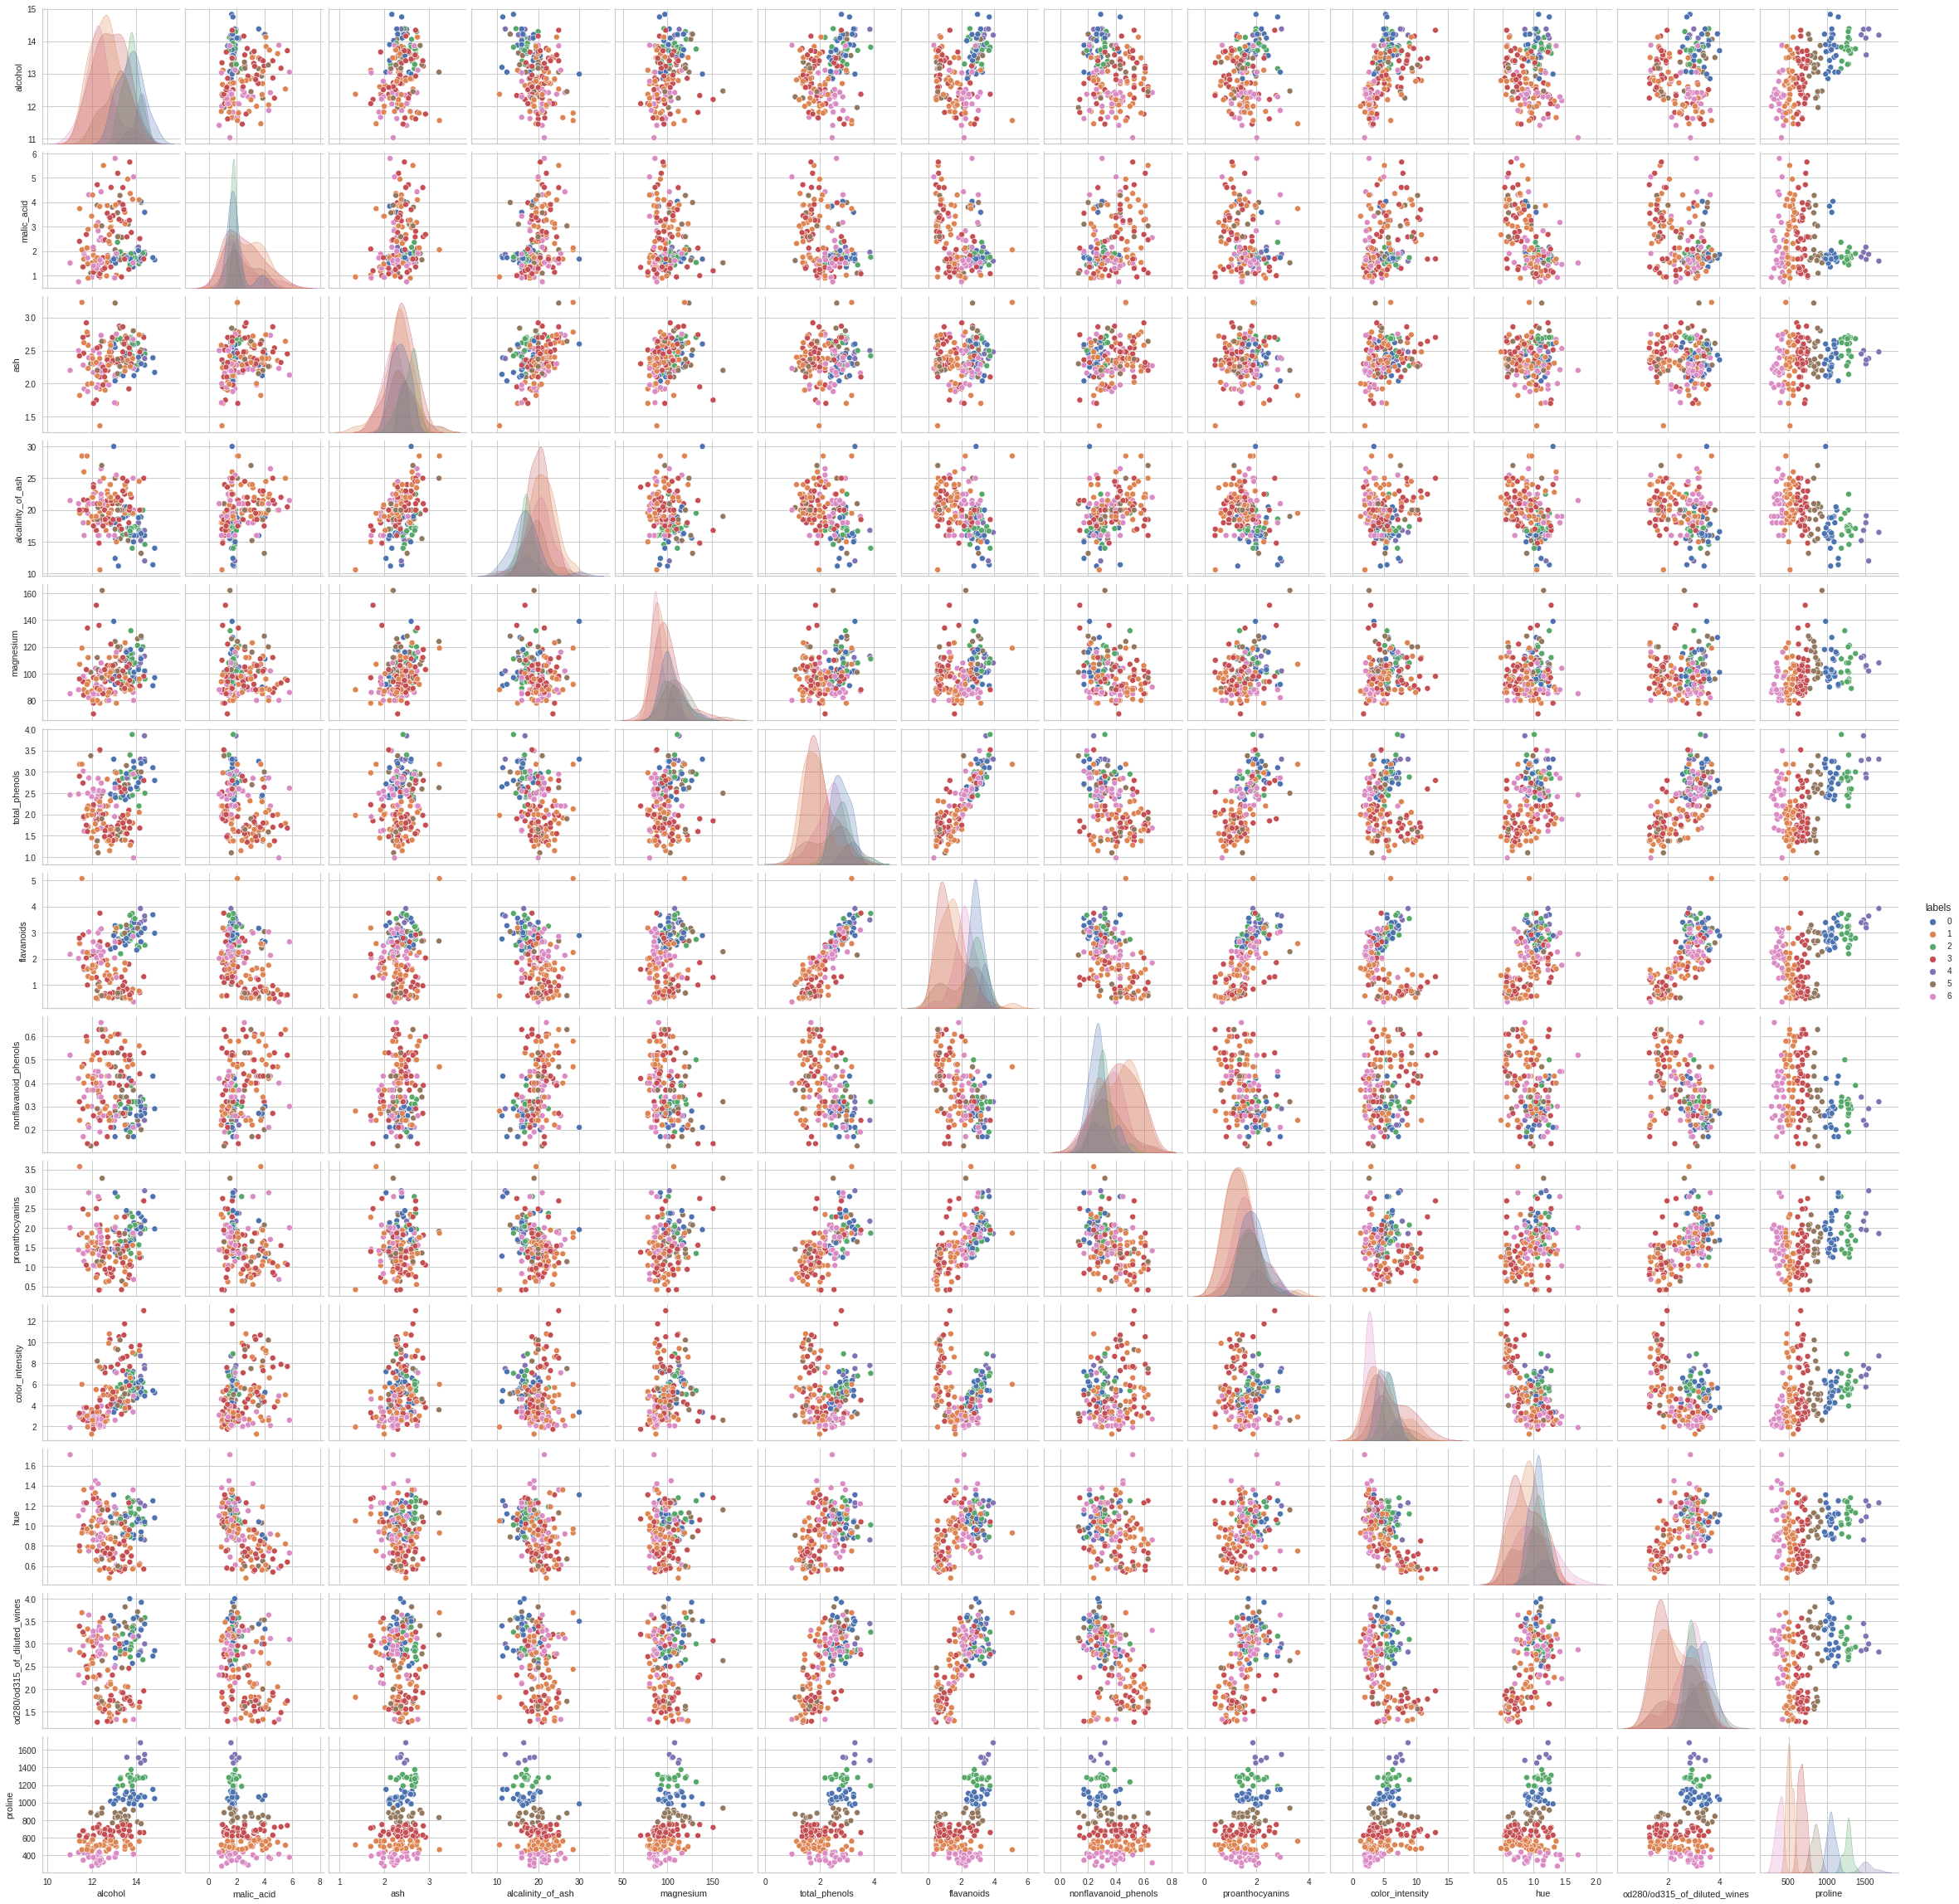

In [9]:

km_7=KMeans(n_clusters=7, random_state=0).fit(X)

df2=X
df2["labels"]=km_7.labels_

sns.pairplot(df2, hue="labels", diag_kind="kde", palette="deep");

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x0_pca', ylabel='x1_pca'>

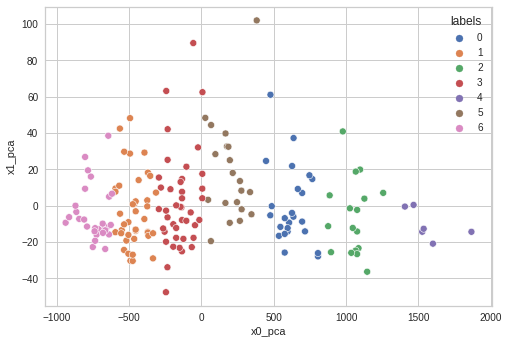

In [30]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X)
#plt.scatter(X_pca,X_pca)

x0_pca=[el[0] for el in X_pca]
x1_pca=[el[1] for el in X_pca]

df["x0_pca"]=x0_pca
df["x1_pca"]=x1_pca
sns.scatterplot(df["x0_pca"],df["x1_pca"],hue=df["labels"], palette="deep");

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x0_pca', ylabel='x1_pca'>

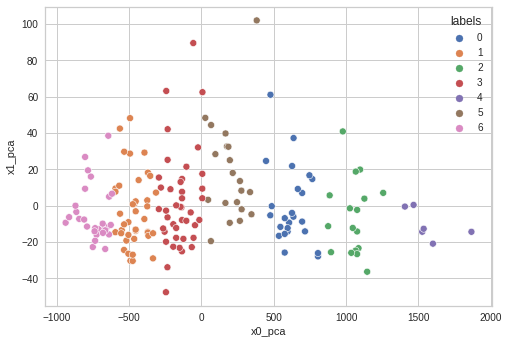

In [31]:
df2["x0_pca"]=x0_pca
df2["x1_pca"]=x1_pca
sns.scatterplot(df2["x0_pca"],df2["x1_pca"],hue=df2["labels"], palette="deep");

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.